In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import h5py
import pandas as pd

from skimage.measure import block_reduce

mpl.rcParams['font.size'] = 12


In [2]:
#f = h5py.File("data_files/bnb_WithWire_00.h5")
f = h5py.File("data_files/nue_WithWire_00.h5")
f.keys()

<KeysViewHDF5 ['edep_table', 'event_table', 'hit_table', 'opflash_table', 'opflashsumpe_table', 'ophit_table', 'pandoraHit_table', 'pandoraPfp_table', 'pandoraPrimary_table', 'particle_table', 'wire_table']>

In [3]:
wire_table_rse_num_tups = np.array(f['wire_table']['event_id'], dtype=np.uint32)
event_table_rse_num_tups = np.array(f['event_table']['event_id'], dtype=np.uint32)
particle_table_rse_num_tups = np.array(f['particle_table']['event_id'], dtype=np.uint32)

wire_table_rse_nums = wire_table_rse_num_tups[:, 0] * 1_000_000_000_000 + wire_table_rse_num_tups[:, 1] * 1_000_000 + wire_table_rse_num_tups[:, 2]
event_table_rse_nums = event_table_rse_num_tups[:, 0] * 1_000_000_000_000 + event_table_rse_num_tups[:, 1] * 1_000_000 + event_table_rse_num_tups[:, 2]
particle_table_rse_nums = particle_table_rse_num_tups[:, 0] * 1_000_000_000_000 + particle_table_rse_num_tups[:, 1] * 1_000_000 + particle_table_rse_num_tups[:, 2]

unique_rse_nums = np.unique(wire_table_rse_nums)

print(f"num events * num wires: {len(wire_table_rse_nums)}")
print(f"num events: {len(unique_rse_nums)}")


num events * num wires: 10179648
num events: 1233


event_nu_vtx_coords: [151.70021     6.0382285 472.3442   ]
event_nu_vtx_wire_pos: [1116 1129 1573]
event_nu_vtx_wire_time: [4362.2344]
event_particle_start_wire_pos: [1116 1129 1573]
event_particle_start_wire_time: [3652.6392]


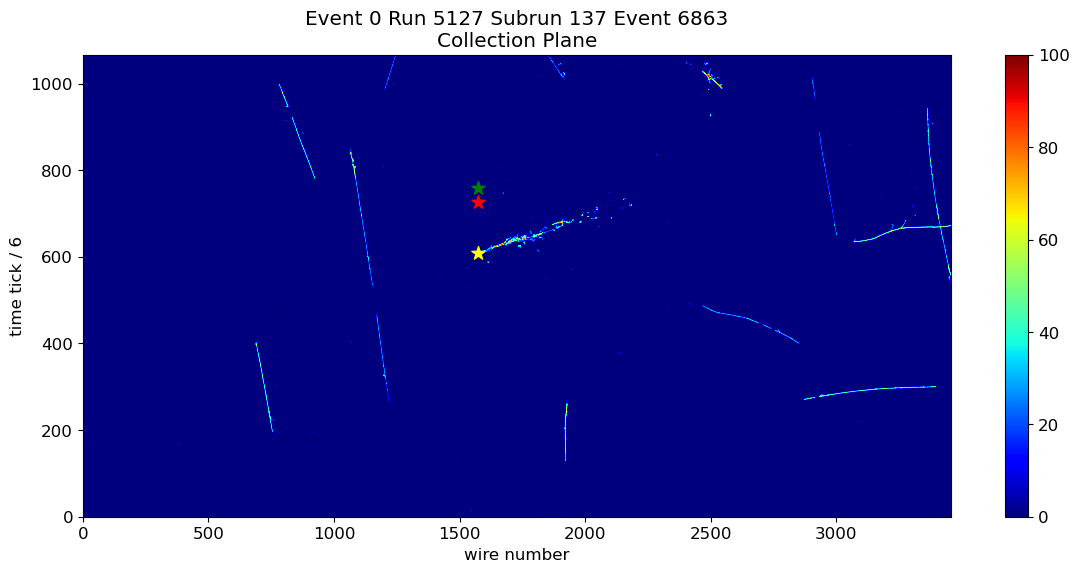

event_nu_vtx_coords: [151.44785     6.1295195 409.42233  ]
event_nu_vtx_wire_pos: [1009 1026 1364]
event_nu_vtx_wire_time: [4122.988]
event_particle_start_wire_pos: [1009 1026 1364]
event_particle_start_wire_time: [3646.1719]


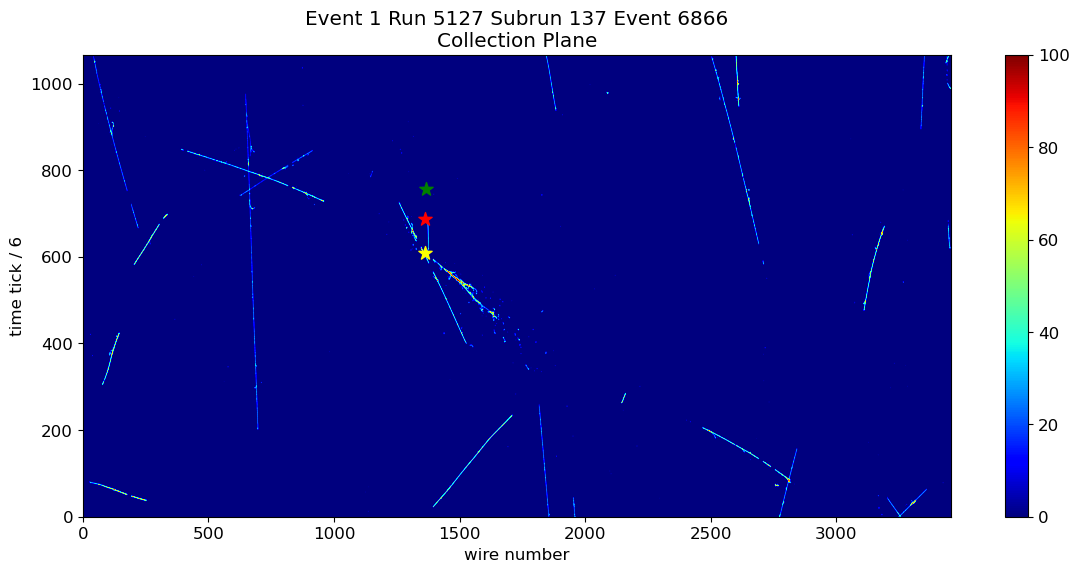

event_nu_vtx_coords: [145.22049  94.30538 666.41846]
event_nu_vtx_wire_pos: [1187 1705 2221]
event_nu_vtx_wire_time: [3478.3828]
event_particle_start_wire_pos: [1187 1705 2221]
event_particle_start_wire_time: [3488.4653]


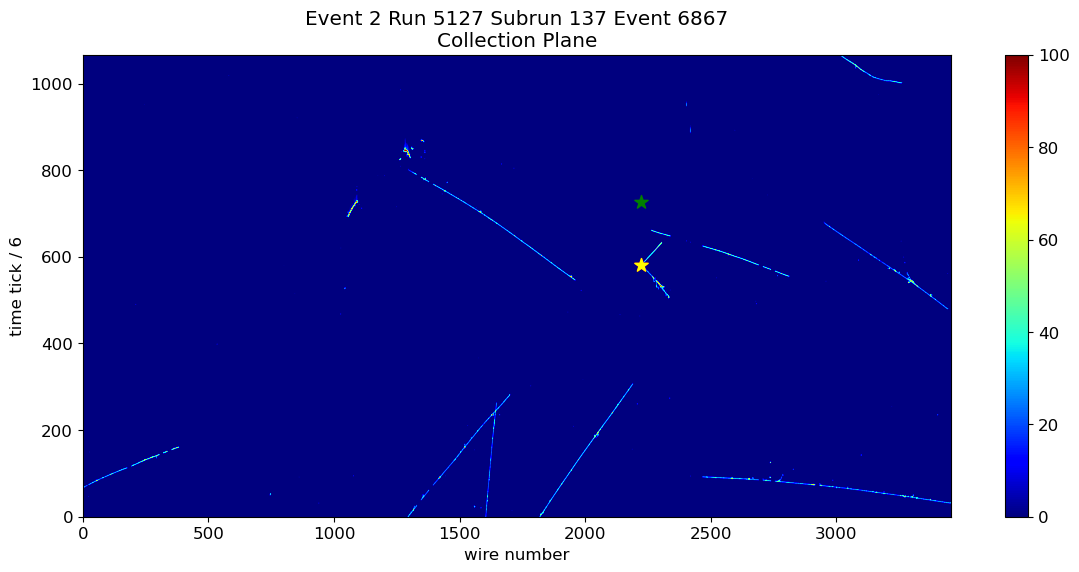

event_nu_vtx_coords: [150.07222     6.6271224  66.45103  ]
event_nu_vtx_wire_pos: [439 460 227]
event_nu_vtx_wire_time: [4672.146]
event_particle_start_wire_pos: [439 460 227]
event_particle_start_wire_time: [3587.503]


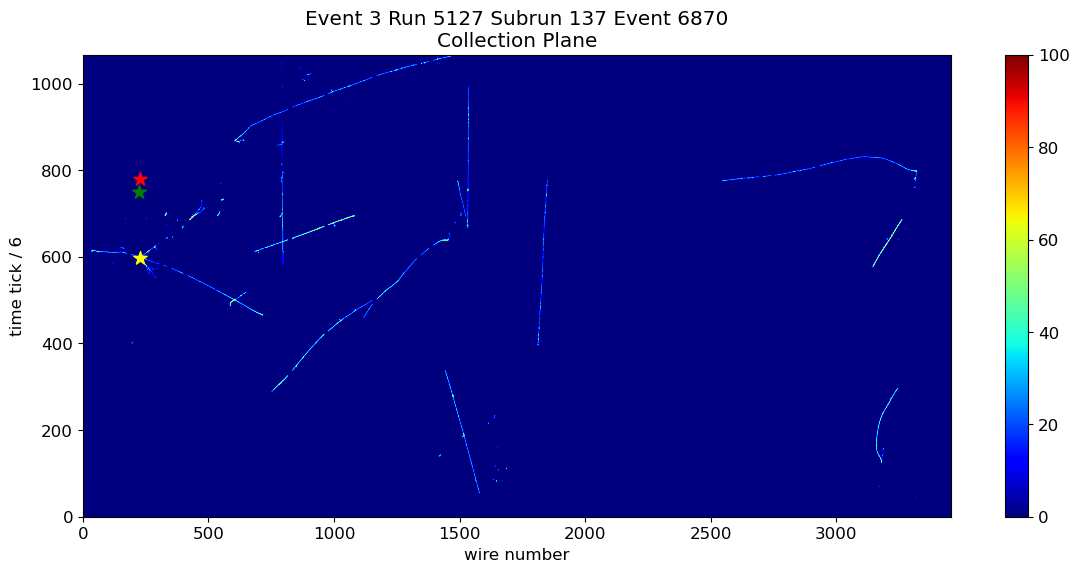

event_nu_vtx_coords: [ 7.3078078e-01 -7.6687309e+01  7.6354126e+02]
event_nu_vtx_wire_pos: [1832 1384 2544]
event_nu_vtx_wire_time: [3296.1042]
event_particle_start_wire_pos: [1832 1384 2544]
event_particle_start_wire_time: [834.8746]


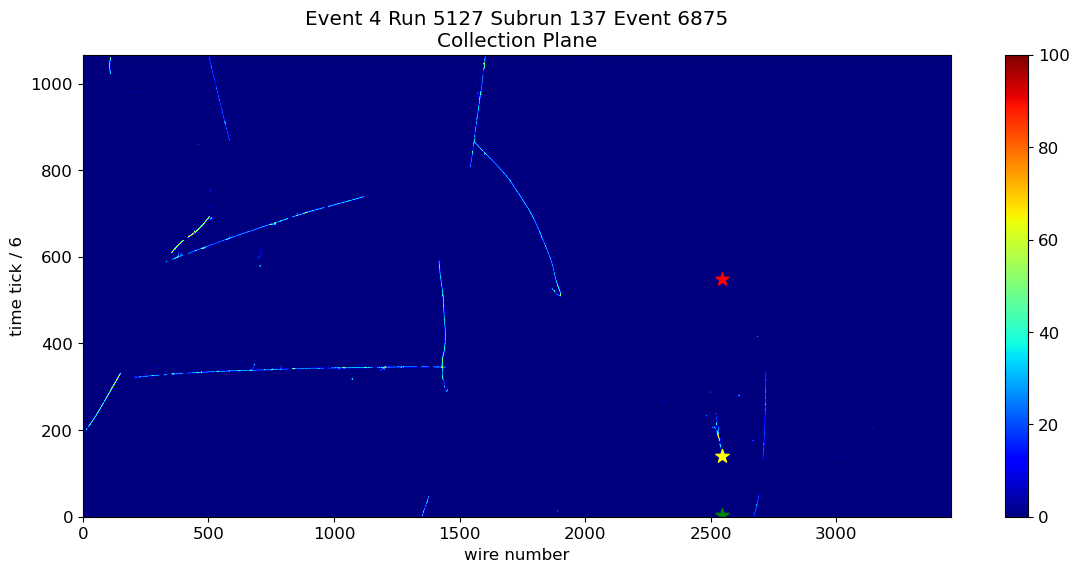

event_nu_vtx_coords: [150.56322     6.4495134 188.86728  ]
event_nu_vtx_wire_pos: [639 660 628]
event_nu_vtx_wire_time: [3960.7664]
event_particle_start_wire_pos: [639 660 628]
event_particle_start_wire_time: [3605.5037]


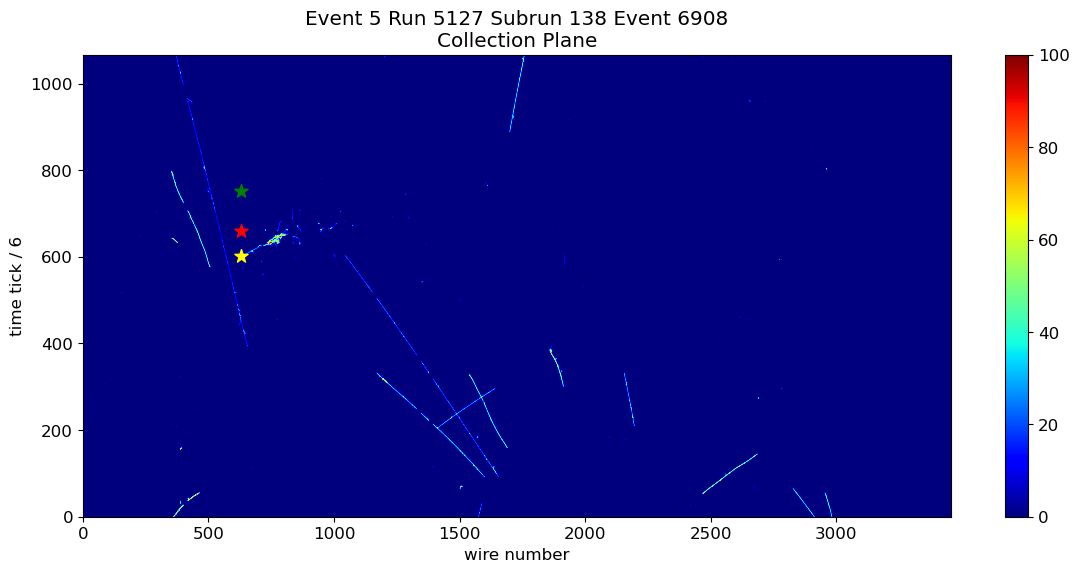

event_nu_vtx_coords: [ 37.894745  82.62707  686.2305  ]
event_nu_vtx_wire_pos: [1244 1715 2287]
event_nu_vtx_wire_time: [3885.566]
event_particle_start_wire_pos: [1244 1715 2287]
event_particle_start_wire_time: [1520.0492]


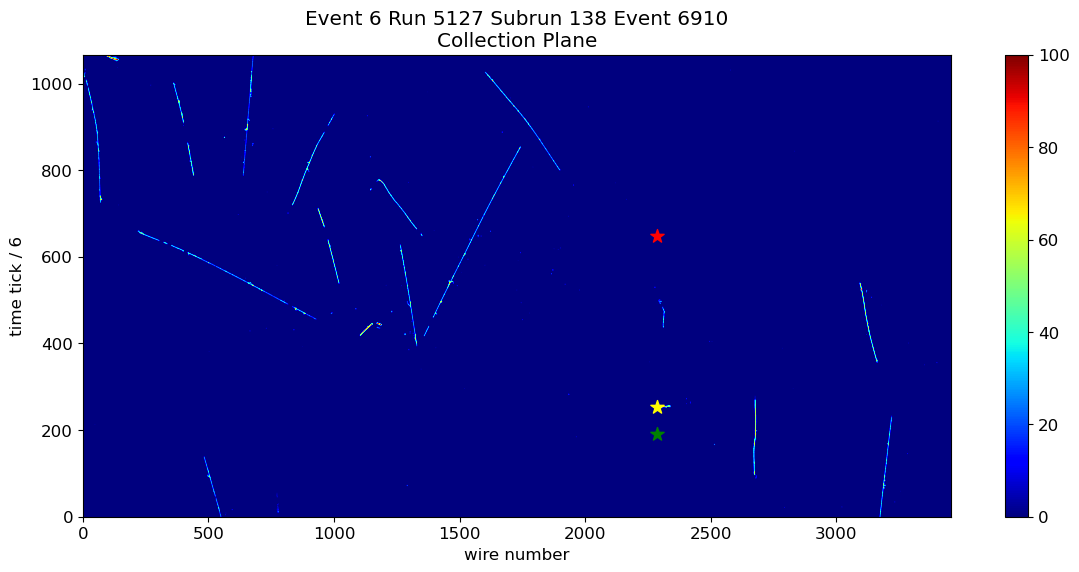

event_nu_vtx_coords: [217.05186 107.82766  94.76768]
event_nu_vtx_wire_pos: [197 791 317]
event_nu_vtx_wire_time: [3173.5144]
event_particle_start_wire_pos: [197 791 317]
event_particle_start_wire_time: [4779.4883]


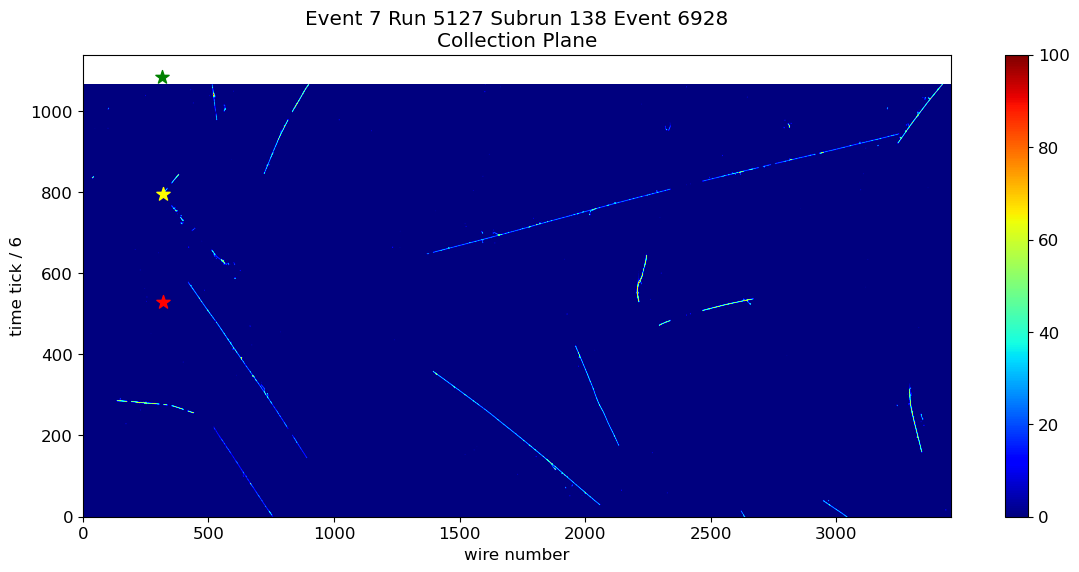

event_nu_vtx_coords: [195.94757   45.644817 381.2571  ]
event_nu_vtx_wire_pos: [ 855 1087 1270]
event_nu_vtx_wire_time: [4511.2026]
event_particle_start_wire_pos: [ 855 1087 1270]
event_particle_start_wire_time: [4434.4175]


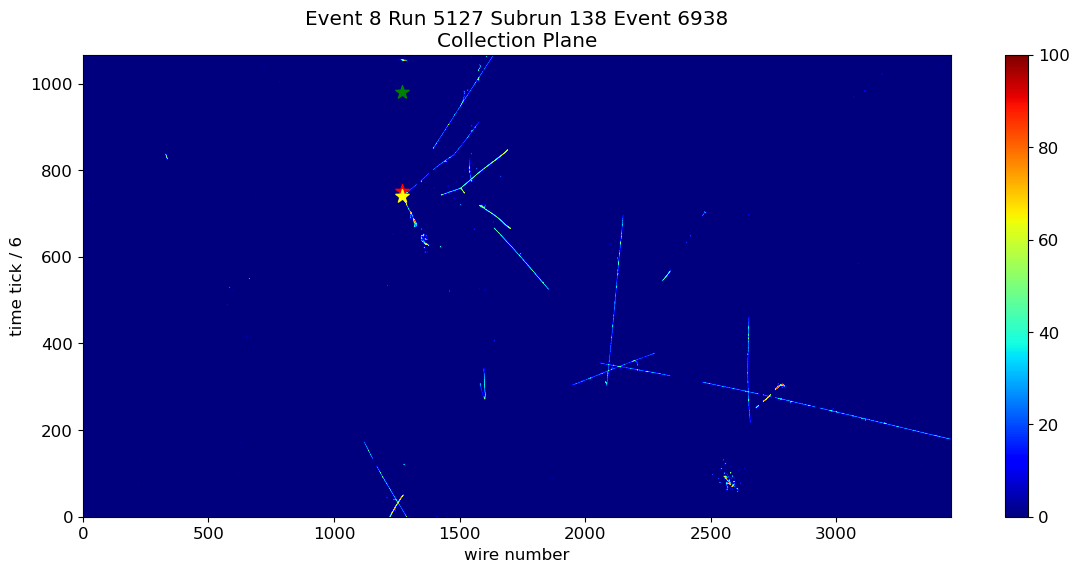

event_nu_vtx_coords: [169.17192  116.1512   117.167244]
event_nu_vtx_wire_pos: [206 856 391]
event_nu_vtx_wire_time: [3233.8257]
event_particle_start_wire_pos: [206 856 391]
event_particle_start_wire_time: [3906.233]


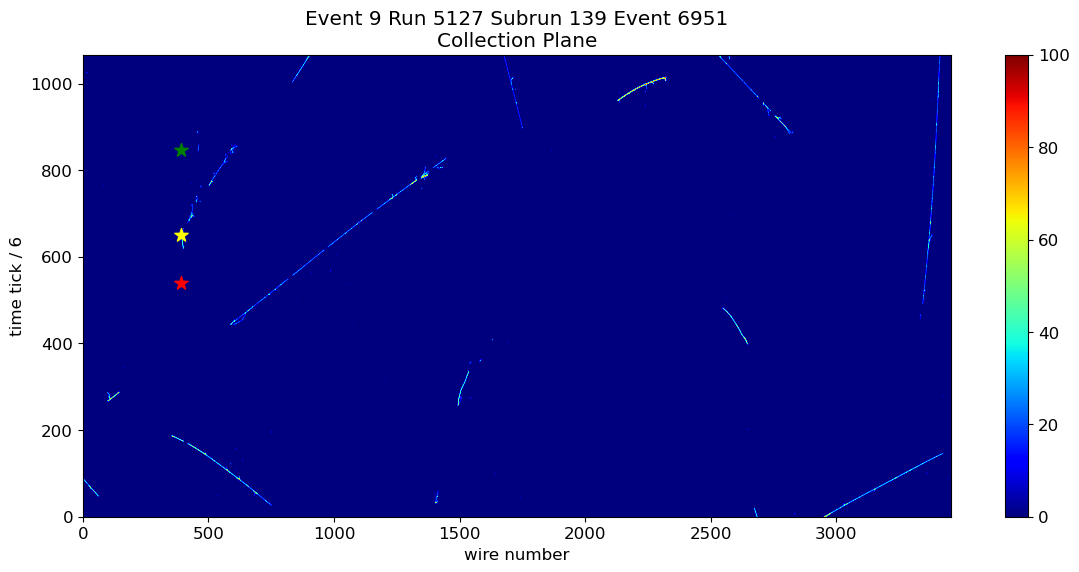

In [4]:
all_adcs = f['wire_table']['adc']
all_local_wires = f['wire_table']['local_wire']
all_local_planes = f['wire_table']['local_plane']

nu_vtx_coords = f['event_table']['nu_vtx']
nu_vtx_wire_pos = f['event_table']['nu_vtx_wire_pos']
nu_vtx_wire_time = f['event_table']['nu_vtx_wire_time']

particle_start_wire_pos = f['particle_table']['start_wire_pos']
particle_start_wire_time = f['particle_table']['start_wire_time']


num_events = 10
for event_i in range(num_events):

    curr_rse_num = unique_rse_nums[event_i]
    curr_run_num = int(curr_rse_num // 1_000_000_000_000)
    curr_subrun_num = int((curr_rse_num % 1_000_000_000_000) // 1_000_000)
    curr_event_num = int(curr_rse_num % 1_000_000)

    event_nu_vtx_coords = np.array(nu_vtx_coords[event_table_rse_nums == unique_rse_nums[event_i]])[0]
    event_nu_vtx_wire_pos = np.array(nu_vtx_wire_pos[event_table_rse_nums == unique_rse_nums[event_i]])[0]
    event_nu_vtx_wire_time = np.array(nu_vtx_wire_time[event_table_rse_nums == unique_rse_nums[event_i]])[0]

    print(f"event_nu_vtx_coords: {event_nu_vtx_coords}")
    print(f"event_nu_vtx_wire_pos: {event_nu_vtx_wire_pos}")
    print(f"event_nu_vtx_wire_time: {event_nu_vtx_wire_time}")

    # only looking at first particle
    event_particle_start_wire_pos = np.array(particle_start_wire_pos[particle_table_rse_nums == unique_rse_nums[event_i]])[0]
    event_particle_start_wire_time = np.array(particle_start_wire_time[particle_table_rse_nums == unique_rse_nums[event_i]])[0]

    print(f"event_particle_start_wire_pos: {event_particle_start_wire_pos}")
    print(f"event_particle_start_wire_time: {event_particle_start_wire_time}")

    event_adcs = np.array(all_adcs[wire_table_rse_nums == unique_rse_nums[event_i]])
    event_local_wire_nums = np.array(all_local_wires[wire_table_rse_nums == unique_rse_nums[event_i]]).flatten()
    event_local_plane_nums = np.array(all_local_planes[wire_table_rse_nums == unique_rse_nums[event_i]]).flatten()

    collection_adcs = event_adcs[event_local_plane_nums == 2]
    collection_local_wire_nums = event_local_wire_nums[event_local_plane_nums == 2]
    collection_nu_vtx_wire_pos = event_nu_vtx_wire_pos[2]
    collection_nu_vtx_wire_time = event_nu_vtx_wire_time[0]
    collection_particle_start_wire_pos = event_particle_start_wire_pos[2]
    collection_particle_start_wire_time = event_particle_start_wire_time[0]

    f_downsample = 6
    collection_adcs = block_reduce(collection_adcs, block_size=(1, f_downsample), func=np.sum)

    adccutoff = 10.*f_downsample/6.
    adcsaturation = 100.*f_downsample/6.
    collection_adcs[collection_adcs < adccutoff] = 0
    collection_adcs[collection_adcs > adcsaturation] = adcsaturation

    #print(f"collection_adcs: {collection_adcs.T}")

    plt.figure(figsize=(14, 6))
    #plt.imshow(collection_adcs.T, origin='lower', cmap='jet', aspect='auto')
    plt.imshow(collection_adcs.T, origin='lower', cmap='jet', aspect='auto')
    plt.colorbar()
    plt.scatter(collection_nu_vtx_wire_pos, collection_nu_vtx_wire_time / f_downsample, color='red', s=100, marker='*')
    plt.scatter(collection_particle_start_wire_pos, collection_particle_start_wire_time / f_downsample, color='yellow', s=100, marker='*')
    plt.scatter(event_nu_vtx_coords[2] / 0.3, event_nu_vtx_coords[0]*5, color='green', s=100, marker='*')
    plt.xlabel('wire number')
    plt.ylabel(f'time tick / {f_downsample}')
    plt.title(f'Event {event_i} Run {curr_run_num} Subrun {curr_subrun_num} Event {curr_event_num}\nCollection Plane')
    plt.show()
